# Analisa Data

In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv("data/modis_2022_Indonesia.csv")
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-7.3299,131.4697,316.3,1.5,1.2,2022-01-03,150,Terra,MODIS,47,6.03,285.0,20.5,D,0
1,-7.3264,131.4621,318.8,1.5,1.2,2022-01-03,150,Terra,MODIS,53,6.03,286.4,24.7,D,0
2,-2.5787,121.3817,314.8,2.4,1.5,2022-01-03,150,Terra,MODIS,73,6.03,280.2,36.4,D,2
3,-8.2698,123.5073,310.1,1.3,1.1,2022-01-03,151,Terra,MODIS,19,6.03,287.9,7.2,D,1
4,-6.8675,107.4992,315.1,1.7,1.3,2022-01-03,329,Terra,MODIS,41,6.03,294.8,9.3,D,2


In [15]:
df.shape

(11279, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11279 entries, 0 to 11278
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    11279 non-null  float64
 1   longitude   11279 non-null  float64
 2   brightness  11279 non-null  float64
 3   scan        11279 non-null  float64
 4   track       11279 non-null  float64
 5   acq_date    11279 non-null  object 
 6   acq_time    11279 non-null  int64  
 7   satellite   11279 non-null  object 
 8   instrument  11279 non-null  object 
 9   confidence  11279 non-null  int64  
 10  version     11279 non-null  float64
 11  bright_t31  11279 non-null  float64
 12  frp         11279 non-null  float64
 13  daynight    11279 non-null  object 
 14  type        11279 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 1.3+ MB


In [17]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [18]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [19]:
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,11279.000000,11279.000000,11279.000000,11279.000000,11279.000000,11279.000000,11279.000000,1.127900e+04,11279.000000,11279.000000,11279.000000
mean,-3.013565,114.460695,318.027112,1.461229,1.165529,600.114992,58.014718,6.030000e+00,294.041138,20.325392,0.375477
std,3.886948,9.988273,9.778916,0.660518,0.210796,371.571396,21.977861,8.882178e-16,6.469678,24.188064,0.749467
min,-10.806900,95.075500,300.000000,1.000000,1.000000,27.000000,0.000000,6.030000e+00,267.100000,2.500000,0.000000
25%,-7.046600,106.556400,312.300000,1.000000,1.000000,358.000000,45.000000,6.030000e+00,290.800000,8.100000,0.000000
50%,-2.537500,112.928400,316.100000,1.200000,1.100000,548.000000,61.000000,6.030000e+00,294.800000,12.600000,0.000000
75%,0.342550,121.378500,321.500000,1.600000,1.200000,633.000000,73.000000,6.030000e+00,298.000000,22.400000,0.000000
max,5.798200,140.971400,404.200000,4.800000,2.000000,1917.000000,100.000000,6.030000e+00,315.000000,478.900000,3.000000


# Visualisasi Data

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

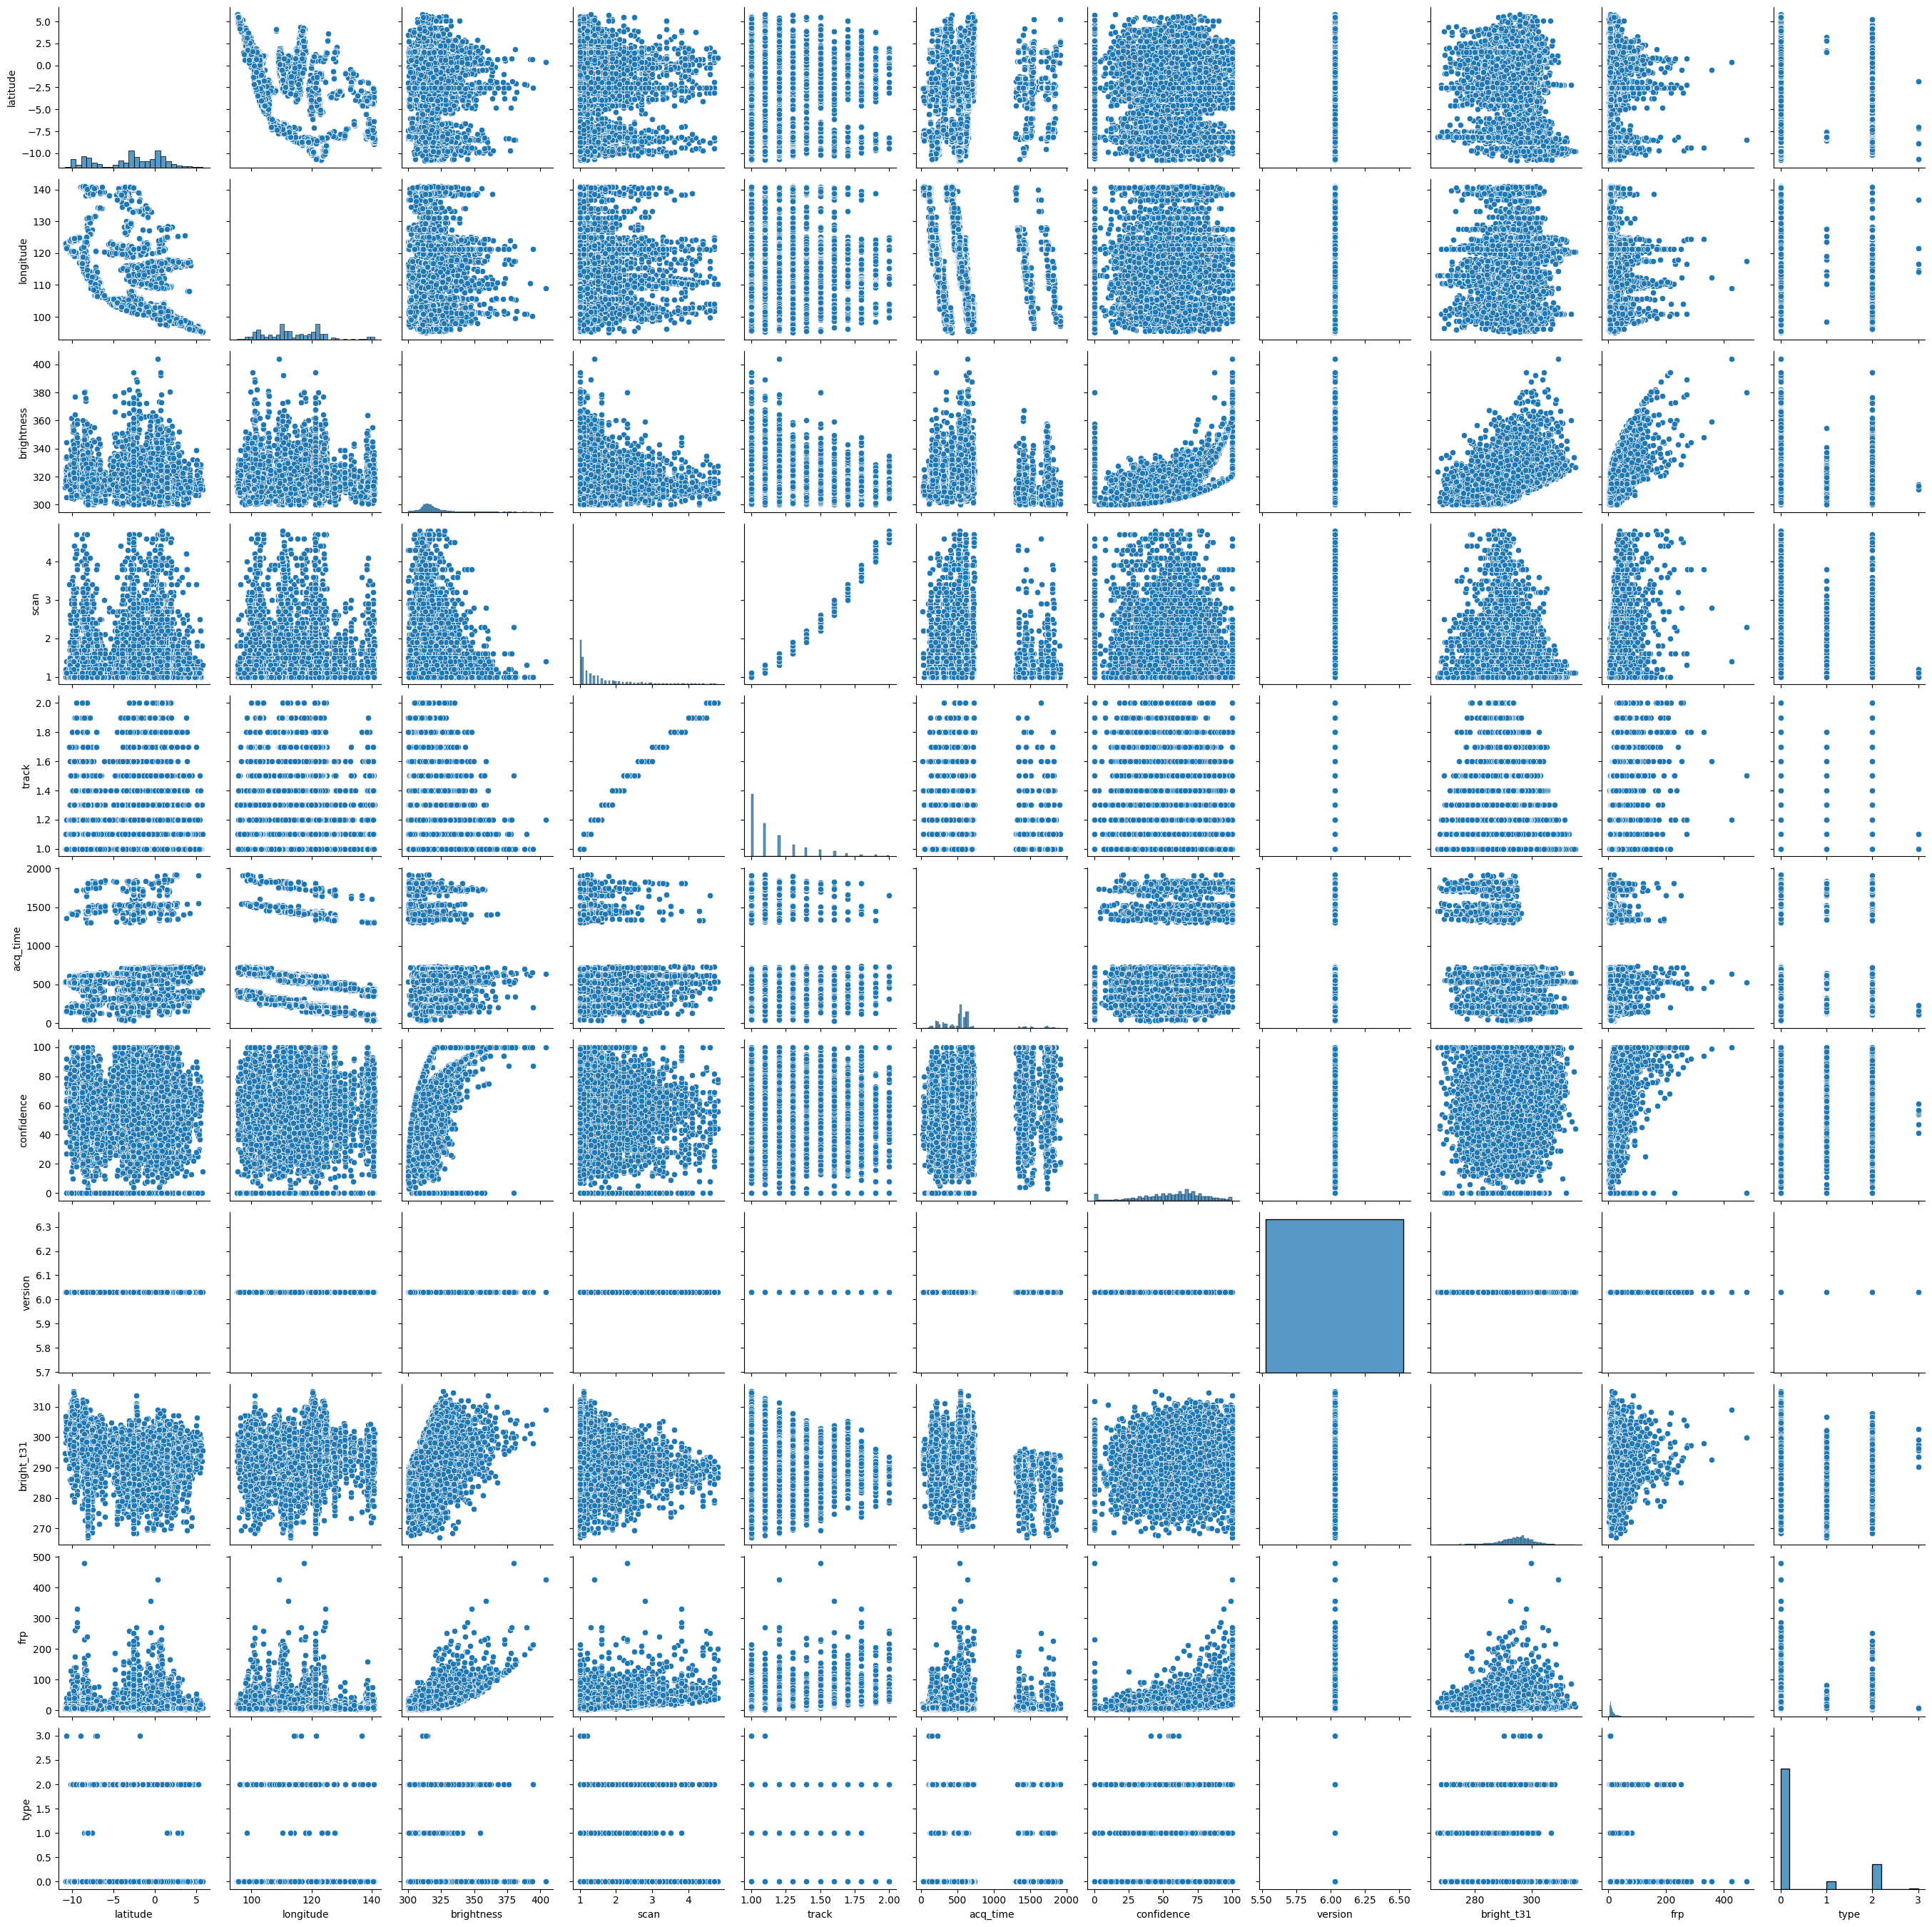

In [21]:
sns.pairplot(df)
plt.show()

##### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables. 

<Axes: xlabel='daynight', ylabel='confidence'>

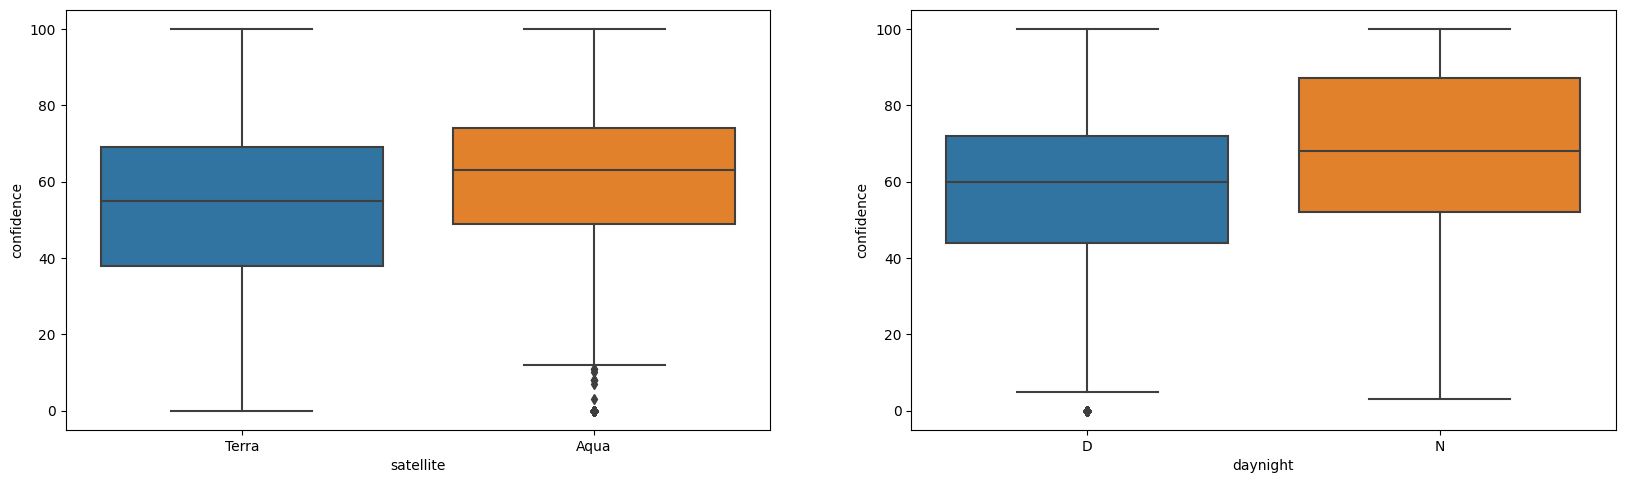

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'satellite', y = 'confidence', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'daynight', y = 'confidence', data = df)

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

ValueError: could not convert string to float: '2022-01-03'

<Figure size 1000x1000 with 0 Axes>

<Axes: xlabel='acq_date', ylabel='frp'>

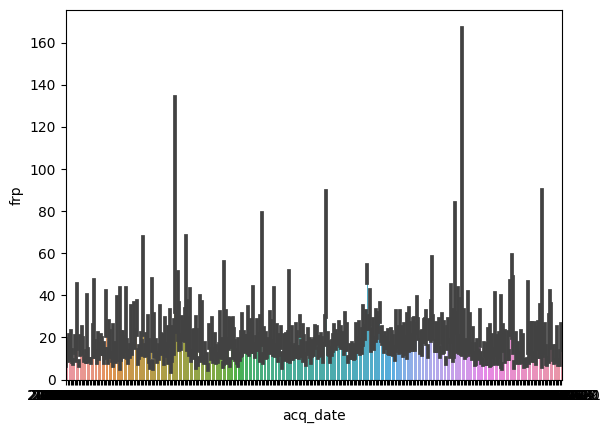

In [24]:
sns.barplot(x='acq_date',y='frp',data=df)

In [25]:
df_topaffected=df.sort_values(by='frp',ascending=False)
df_topaffected.head(10)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
10184,-8.4798,117.6127,379.9,2.3,1.5,2022-10-13,529,Aqua,MODIS,0,6.03,299.8,478.9,D,0
1799,0.3535,109.0861,404.2,1.4,1.2,2022-03-31,635,Aqua,MODIS,100,6.03,309.0,425.6,D,0
7306,-0.4818,112.3472,359.0,2.8,1.6,2022-08-19,540,Aqua,MODIS,99,6.03,292.6,356.9,D,0
9480,-9.3303,124.5203,348.1,3.8,1.8,2022-09-26,450,Aqua,MODIS,94,6.03,298.0,330.5,D,0
9477,-9.3376,124.5300,344.5,3.8,1.8,2022-09-26,450,Aqua,MODIS,92,6.03,297.2,286.2,D,0
9476,-9.3415,124.4965,342.6,3.8,1.8,2022-09-26,450,Aqua,MODIS,91,6.03,297.2,272.6,D,0
1201,-2.2166,101.0073,389.4,1.3,1.1,2022-03-22,641,Aqua,MODIS,100,6.03,303.7,271.1,D,0
9630,0.7499,116.5858,378.4,1.6,1.2,2022-09-27,536,Aqua,MODIS,100,6.03,296.5,270.9,D,0
8742,-9.6644,124.0015,377.1,1.6,1.2,2022-09-15,512,Aqua,MODIS,100,6.03,305.7,261.6,D,0
1256,-3.0872,104.0201,334.8,4.5,2.0,2022-03-23,723,Aqua,MODIS,86,6.03,293.2,258.2,D,0


In [26]:
#Create a map
import folium
m = folium.Map(location=[-0.789275, 113.921327], control_scale=True, zoom_start=5,attr = "text some",)
df_copy = df_topaffected.copy()

# loop through data to create Marker for each hospital
for i in range(0,200):
     
    folium.Marker(location=[df_copy.iloc[i]['latitude'], df_copy.iloc[i]['longitude']],tooltip="frp: " + str(df_copy.iloc[i]['frp']) + "<br/> date: "+ str(df_copy.iloc[i]['acq_date']),icon=folium.Icon(color='red',icon='fire',prefix="fa"),
    ).add_to(m)
        
m

# Data Preparation

In [27]:
df = df.drop(['track'], axis = 1)

df = df.drop(['instrument', 'version'], axis = 1)

In [28]:
df['satellite'] = df['satellite'].map({'Terra':0,'Aqua':1})
df['daynight'] = df['daynight'].map({'D':0,'N':1})
df['month'] = df['acq_date'].apply(lambda x:int(x.split('-')[1]))
df = df.sample(frac=0.2)
df = df.reset_index().drop("index", axis=1)

In [29]:
df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type,month
0,-0.4623,112.0404,307.9,1.1,2022-09-07,606,1,19,290.2,4.2,0,0,9
1,0.7422,111.1563,328.3,1.0,2022-07-21,617,1,81,297.9,20.4,0,0,7
2,-1.2000,103.6190,305.3,1.0,2022-11-20,1520,0,64,286.8,5.5,1,0,11
3,1.5955,101.4758,317.8,1.1,2022-04-02,1541,0,96,294.3,14.7,1,0,4
4,-2.8278,101.5559,318.0,1.0,2022-08-07,656,1,71,297.0,10.0,0,0,8


In [30]:
df.shape

(2256, 13)

In [31]:
y = df['confidence']
firedf = df.drop(['confidence', 'acq_date'], axis = 1)

<Axes: >

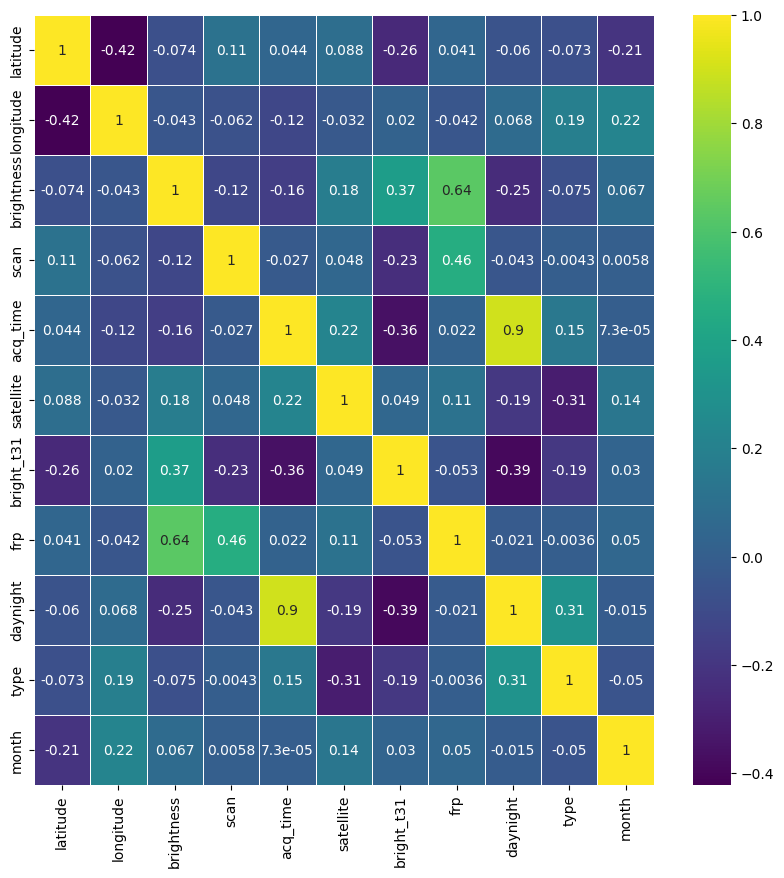

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(firedf.corr(),annot=True,cmap='viridis',linewidths=.5)

In [33]:
firedf.head()

,latitude,longitude,brightness,scan,acq_time,satellite,bright_t31,frp,daynight,type,month
0,-0.4623,112.0404,307.9,1.1,606,1,290.2,4.2,0,0,9
1,0.7422,111.1563,328.3,1.0,617,1,297.9,20.4,0,0,7
2,-1.2000,103.6190,305.3,1.0,1520,0,286.8,5.5,1,0,11
3,1.5955,101.4758,317.8,1.1,1541,0,294.3,14.7,1,0,4
4,-2.8278,101.5559,318.0,1.0,656,1,297.0,10.0,0,0,8


# Splitting the Data into Training and Testing Sets

In [34]:
X = df[['latitude','longitude','month','brightness','scan','acq_time','bright_t31','daynight']]
y = df['frp']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
model1 = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.1,
                                  max_depth = 10, random_state = 0, loss = 'squared_error')
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print ('MSE =',mse(y_pred, y_test))
print ('RSME =',np.sqrt(mse(y_pred, y_test)))
print ('MAE =',mae(y_pred, y_test))
print ('R2_score =',r2_score(y_pred, y_test))

print("Performance ofGBR Model R^2 metric {:.5f}".format(model1.score(X_train,y_train)))
print("GBR Accuracy, {:.5f}%".format(model1.score(X_test,y_test)*100))


MSE = 61.32793942103335
RSME = 7.831215705178433
MAE = 3.3318426769572227
R2_score = 0.8629070470066017
Performance ofGBR Model R^2 metric 0.99996
GBR Accuracy, 88.59640%


In [37]:
from sklearn.tree import DecisionTreeRegressor as dtr
reg = dtr(random_state = 42)
reg.fit(X_train,y_train)
Y_pred = reg.predict(X_test)
print("MSE = ",mse(Y_pred, y_test))
print ('RSME =',np.sqrt(mse(Y_pred, y_test)))
print("MAE =",mae(Y_pred,y_test))
print("R2 score =",r2_score(Y_pred,y_test))
print("Performance of Decision Tree Regressor Model R^2 metric {:.5f}".format(reg.score(X_train,y_train)))
print("Decision Tree Regressor Accuracy, {:.5f}%".format(reg.score(X_test,y_test)*100))

MSE =  66.50605612998524
RSME = 8.155124531850218
MAE = 4.097193500738553
R2 score = 0.8556638371863431
Performance of Decision Tree Regressor Model R^2 metric 1.00000
Decision Tree Regressor Accuracy, 87.63356%


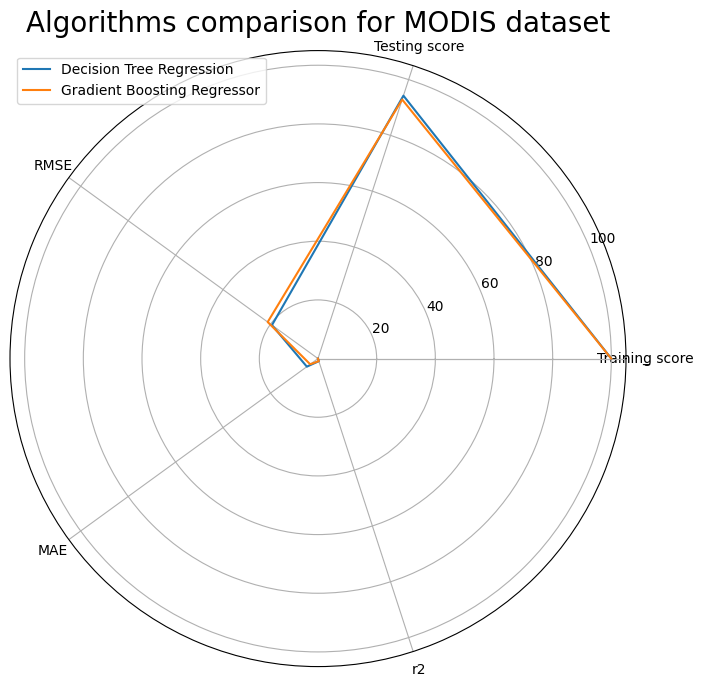

In [38]:

categories = ['Training score', 'Testing score', 'RMSE', 'MAE','r2','_']



Decision_Tree_Regressor = [100,94.24, 19.4,4.69, 0.93,0]


Gradient_Boosting_Regressor = [99.97, 92.86, 21.20,3.29, 0.92,0]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(Decision_Tree_Regressor))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

plt.plot(label_loc, Decision_Tree_Regressor , label='Decision Tree Regression')


plt.plot(label_loc, Gradient_Boosting_Regressor, label='Gradient Boosting Regressor')

plt.title('Algorithms comparison for MODIS dataset', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()